C:\Users\Carl\AppData\Local\Temp\ipykernel_37568\3396646843.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(file_path)


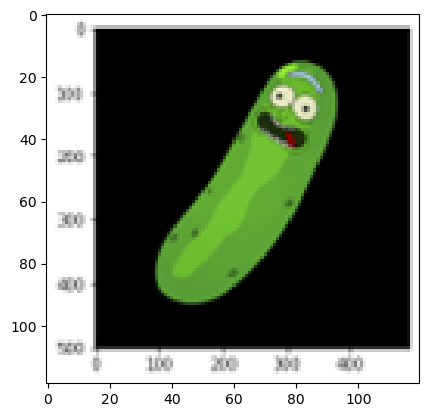

In [122]:
# Step 3: Choose and load image


import numpy as np
from scipy import misc
import imageio
import matplotlib.pyplot as plt

file_path = r'C:\Users\Carl\Desktop\Syntra - Data Scientist\Notities Lessen\Les 17 - Examen Numpy\images\image_raw.png'

img = imageio.imread(file_path)

plt.imshow(img)
plt.show()


(100, 100, 4)


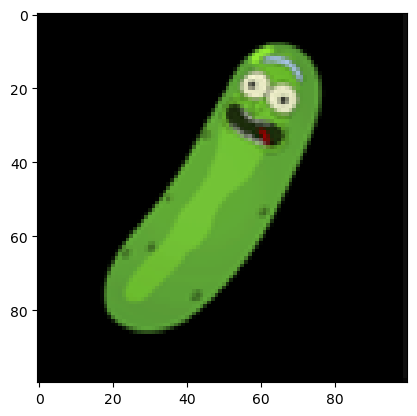

In [123]:
# We gaan de randen wat croppen, om enkel het zwart kader over te houden

# We gaan een array aanmaken en die vervolgens slicen, tot we een mooi vierkant overhouden in shape 100x100.
np_image = np.array(img)

cropped = np_image[7:107:, 17:117:, ::]

print(cropped.shape)
plt.imshow(cropped)
plt.show()

In [ ]:
# Step 4: Do Image Manipulations

In [179]:
# Momenteel is onze augurk 100x100, maar zou eigenlijk 500x500 moeten worden.
# Op Stackoverflow volgende oplossing gevonden:

import cv2
cropped = cv2.resize(cropped, dsize=(500, 500), interpolation=cv2.INTER_CUBIC)

In [161]:
pip install opencv-python


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.8 MB 9.6 MB/s eta 0:00:05
    --------------------------------------- 0.9/38.8 MB 10.9 MB/s eta 0:00:04
   - -------------------------------------- 1.5/38.8 MB 12.0 MB/s eta 0:00:04
   -- ------------------------------------- 2.1/38.8 MB 12.5 MB/s eta 0:00:03
   -- ------------------------------------- 2.8/38.8 MB 12.8 MB/s eta 0:00:03
   --- ------------------------------------ 3.5/38.8 MB 14.1 MB/s eta 0:00:03
   ---- ----------------------------------- 4.4/38.8 MB 14.7 MB/s eta 0:00:03
   ----- ---------------------------------- 5.2/38.8 MB 15.3 MB/s eta 0:00:03
   ------ --------------------------------- 6.0/38.8 MB 15.4 MB/s eta 0:00:03
   ------- -------------------------------- 6.8/38.8 MB 15.5 MB/s eta 0:00:03
   ------- -------------------------------- 7.5/38.8 MB 15.6 MB/s eta 0:00:03
   -------- ------------------------------- 8.3/38.8 MB 15.7 MB/s eta 0:

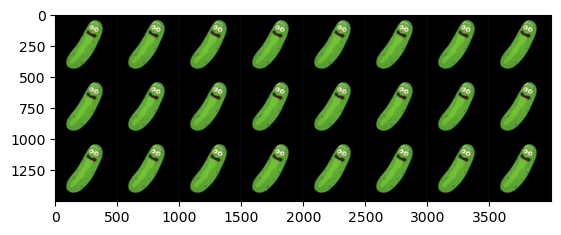

In [180]:
# AFBEELDING 1


#Om de eerste afbeelding te creëren gaan we eerst horizontaal en daarna vertikaal stacken
stack_1 = np.hstack([cropped]*8)
afbeelding_1 = np.vstack([stack_1]*3)


plt.imshow(afbeelding_1)
plt.show()


In [181]:
# AFBEELDING 2
# We moeten onze vriend nu laten spiegelen over verschillende assen.


# Voor de eerste afbeelding kunnen we numpy gebruiken, die de array eenvoudig spiegelt:
spiegel_1 = np.fliplr(cropped)
# De tweede afbeelding kunnen we gemakkelijk doen via indexering.
spiegel_2 = cropped[::-1]
# Voor de derde gaan we opnieuw spiegelen.
spiegel_3 = np.fliplr(spiegel_2)


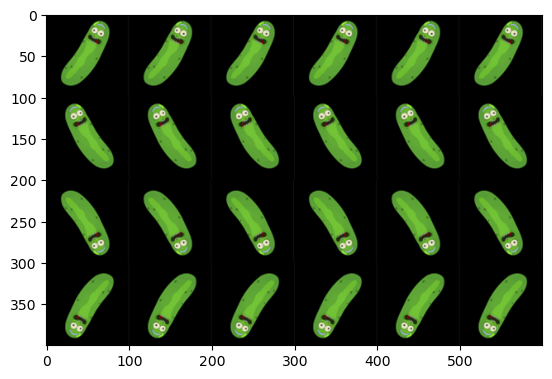

In [139]:
# Om de 2de afbeelding te vormen, is het dan opnieuw een kwestie van stacken.

row_1 = np.hstack([cropped]*6)
row_2 = np.hstack([spiegel_1]*6)
row_3 = np.hstack([spiegel_2]*6)
row_4 = np.hstack([spiegel_3]*6)

afbeelding_2 = np.vstack((row_1, row_2, row_3, row_4))

plt.imshow(afbeelding_2)
plt.show()

In [182]:
# AFBEELDING 3
# We gaan beginnen met een rood en een blauw exemplaar aan te maken.

rood = cropped.copy()
rood[:,:,[1,2]] = 0

blauw = cropped.copy()
blauw[:,:,[0,1]] = 0

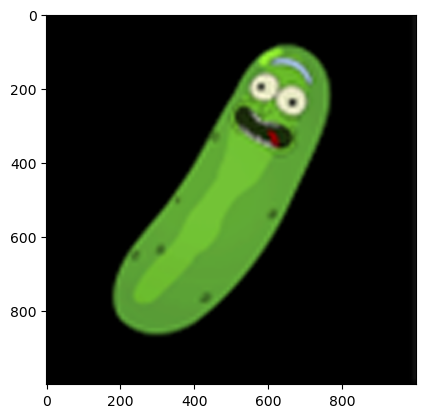

In [172]:
# We hebben ook een augurk nodig op grootte 1000x1000. Doen we opnieuw via OpenCV:
groot = cv2.resize(cropped, dsize=(1000, 1000), interpolation=cv2.INTER_CUBIC)


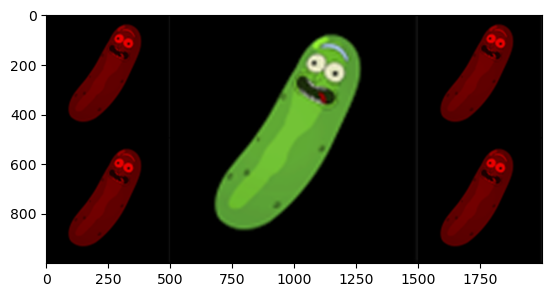

In [183]:
# Nu is het opnieuw een kwestie van stacken:

# De bovenste en de onderste rij zijn eenvoudig:
boven = np.hstack([blauw]*4)
onder = np.hstack([cropped]*4)

# Om het middelste gedeelde te maken, gaan we beginnen met de zijkanten. Dit zijn 2 rode augurken die vertikaal gestackt worden.
zijkant = np.vstack([rood]*2)

# De middelste strook kunnen we nu zo maken:
midden = np.hstack((zijkant, groot, zijkant))

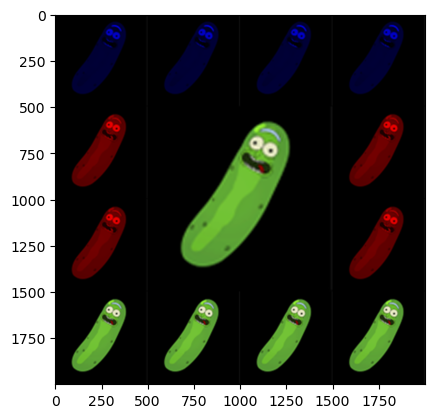

In [184]:
# Nu zetten we de 3 delen op elkaar, die arrays zouden vertikaal gestackt moeten kunnen worden...

afbeelding_3 = np.vstack((boven, midden, onder))

plt.imshow(afbeelding_3)
plt.show()

In [ ]:
# Step 5: generalize these manipulations

In [ ]:
# FUNCTIE 1

In [214]:
matrix = []

def grid_with_flips(image, matrix):
    spiegeling = int(input('Wil je een spiegeling toevoegen'))
    
    for x in matrix:
        if x == 0: # onveranderd
            continue
        elif x == 1: # flip left
            image = np.fliplr(image) 
        elif x == 2: # flip upside down = 180° draaien (kan je bereiken door over beide assen te spiegelen)
            image = np.flipud(image)
            image = np.fliplr(image)       
        elif x == 3: # flip left, right and upside down
            image = np.flip(image,0)   
        else:
            print("De Matrix bevat een fout!")
            break
    plt.imshow(image)
    plt.show()

In [233]:
# Probleem met onderstaande functie: Er wordt geen matrix gevormd op basis van wat de gebruiker ingeeft.
# Alles wordt horizontaal gestackt.


def grid_with_flips(image):
    x = int(input("Hoeveel augurkjes wil je naast elkaar zien?: "))
    y = int(input("Hoeveel rijen augurkjes wil je zien?: "))
    total = image  # Dit klopt al zeker niet.  
    
    for i in range (x):
        for j in range (y):
            spiegeling = int(input('Welke spiegeling wil je toevoegen (0,1,2 of 3)?: '))
            if spiegeling == 0: # onveranderd
                new_image = image 
                total = np.hstack((total, new_image))
            elif spiegeling == 1: # flip left
                new_image = np.fliplr(image)
                total = np.hstack((total, new_image))
            elif spiegeling == 2: # flip upside down = 180° draaien (kan je bereiken door over beide assen te spiegelen)
                new_image = np.flipud(image)
                new_image = np.fliplr(new_image)
                total = np.hstack((total, new_image))
            elif spiegeling == 3: # flip left, right and upside down
                new_image = np.flip(image,0)
                total = np.hstack((total, new_image))
            else:
                print("Die spiegeling ken ik niet...")
                break
    plt.imshow(total)
    plt.show()

Hoeveel augurkjes wil je naast elkaar zien?: 3
Hoeveel rijen augurkjes wil je zien?: 2
Welke spiegeling wil je toevoegen (0,1,2 of 3)?: 1
Welke spiegeling wil je toevoegen (0,1,2 of 3)?: 2
Welke spiegeling wil je toevoegen (0,1,2 of 3)?: 1
Welke spiegeling wil je toevoegen (0,1,2 of 3)?: 2
Welke spiegeling wil je toevoegen (0,1,2 of 3)?: 1
Welke spiegeling wil je toevoegen (0,1,2 of 3)?: 2


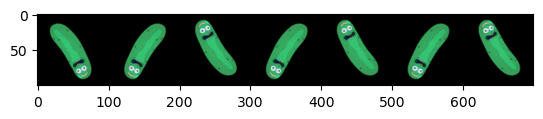

In [236]:
grid_with_flips(cropped)

In [242]:
# Poging 2: Als een gebruiker aangeeft dat hij x augurkjes naast elkaar wil, dan moet er een nieuwe rij gestart worden.
# Op het einde moeten alle rijen (y) dan vertikaal op elkaar gestackt worden.
# Onderstaande functie werkt niet, maar de logica erachter is mogelijks duidelijk...


def grid_with_flips(image):
    x = int(input("Hoeveel augurkjes wil je naast elkaar zien?: "))
    y = int(input("Hoeveel rijen augurkjes wil je zien?: "))
    totaal_aantal_augurken = x*y
    totale_afbeelding = None  # Dit klopt al zeker niet. Maar in onderstaande for-loop wordt gestackt, dus je hebt een array nodig om mee te beginnen?  

    
    for j in range (y):
        #Alle rijen die we hieronder maken verticaal stacken.
        rows = None
        totale_afbeelding = np.vstack((rows))
        
        for i in range (x):
                spiegeling = int(input('Welke spiegeling wil je toevoegen (0,1,2 of 3)?: '))
                if spiegeling == 0: # onveranderd
                    new_image = image 
                    row = np.hstack((total, new_image))
                elif spiegeling == 1: # flip left
                    new_image = np.fliplr(image)
                    row = np.hstack((total, new_image))
                elif spiegeling == 2: # flip upside down = 180° draaien (kan je bereiken door over beide assen te spiegelen)
                    new_image = np.flipud(image)
                    new_image = np.fliplr(new_image)
                    row = np.hstack((total, new_image))
                elif spiegeling == 3: # flip left, right and upside down
                    new_image = np.flip(image,0)
                    row = np.hstack((total, new_image))
                else:
                    print("Die spiegeling ken ik niet...")
                    break
                return
                rows.extend(row)
    
    plt.imshow(totale_afbeelding)
    plt.show()
    

In [ ]:
# FUNCTIE 2
# Teveel tijd verloren met bovenstaande opgave en hierdoor te weinig tijd meer over voor deze functie. Nog snel aan begonnen...

In [251]:
# Er moeten in totaal 12 kleine augurken aangemaakt worden. Wie moeten rond de grote augurk geplot worden.
colors = []


def create_colorful_big_ones(colors):
    while len(colors) <  12:
        volgende_kleur = input("Welk kleur augurk wil je als volgende toevoegen? ('B', 'R' of 'G'):")
        colors.append(volgende_kleur.lower())
        
        # Vervolgens zou ik voor ieder item van de list 'colors' via een forloop nieuwe augurkjes maken
        # Die dan stacken zoals in voorgaande oefeningen

    
        
    